## Filtering for CRN with neural martingales

### Chemical Reaction Network setup

In [1]:
import pandas as pd
from CRN_Simulation_Inference.RB_method_for_model_identification.RBForModelIdentification import RBForModelIdentification
import numpy as np
import matplotlib.pyplot as plt  
from tqdm import tqdm
import torch
from ElenaDataManagement import count_samples_for_supersampling, get_X_Y_sampling_times, sample_trajectory_on_times, CRN_simulations_to_dataloaders, run_SSA_for_filtering

sigma = 0.1

species_names = ['mRNA', 'P']
stoichiometric_matrix = [[1, -1, 0, 0],
                         [0,  0, 1,-1]]
parameters_names = ['mb', 'md', 'tr', 'pd']
reaction_names = ['mrna prod.', 'mrna deg.', 'prot prod.', 'prot deg.']
propensities = [
    lambda mb: mb,
    lambda md, mRNA: md*mRNA,
    lambda tr, mRNA: tr*mRNA,
    lambda pd, P: pd*P
]

range_of_species = \
    pd.DataFrame([[0, 120], [0, 120]], index=species_names, columns=['min', 'max'])
range_of_parameters= \
    pd.DataFrame([[0, 120], [0, 129], [0, 150.], [0., 150.]],index=parameters_names,columns=['min', 'max'])
discretization_size_parameters = \
    pd.DataFrame([21, 21, 151, 31], index=parameters_names) #index=parameters_names

# The observation related information
# h_function = [
#     lambda Protein: Protein
# ]
h_function = [
    lambda P: P # np.where(mRNA > 5, mRNA, 0)
]
observation_noise_intensity = [
    lambda : sigma
]
#observation_noise_intensity = {'sigma1': 0.1}


# sigma = 0.001

# species_names = ['mRNA']
# stoichiometric_matrix = [[1, -1]]
# parameters_names = ['k','g']
# reaction_names = ['mRNA prod.', 'mRNA deg.']
# propensities = [
#     lambda k: k,
#     lambda g, mRNA: g*mRNA,
# ]

# range_of_species = \
#     pd.DataFrame([[0, 120]], index=species_names, columns=['min', 'max'])
# range_of_parameters= \
#     pd.DataFrame([[0, 150], [0, 150]],index=parameters_names,columns=['min', 'max'])
# discretization_size_parameters = \
#     pd.DataFrame([100, 100], index=parameters_names) #index=parameters_names

# # The observation related information
# # h_function = [
# #     lambda Protein: Protein
# # ]
# h_function = [
#     lambda mRNA: mRNA # np.where(mRNA > 5, mRNA, 0)
# ]
# observation_noise_intensity = [
#     lambda : sigma
# ]
# #observation_noise_intensity = {'sigma1': 0.1}

maximum_size_of_each_follower_subsystem = 20000 #800 # 1000


MI = RBForModelIdentification(
    species_names=species_names,
    stoichiometric_matrix=stoichiometric_matrix,
    parameters_names=parameters_names,
    reaction_names=reaction_names,
    propensities=propensities,
    range_of_species=range_of_species,
    range_of_parameters=range_of_parameters,
    observation_noise_intensity=observation_noise_intensity,
    discretization_size_parameters=discretization_size_parameters,
    h_function=h_function,
    maximum_size_of_each_follower_subsystem=maximum_size_of_each_follower_subsystem)

print('leader species: ', MI.leader_species_time_course_data)
print('follower species: ', MI.get_follower_species_time_course_data())
print('follower parameters: ', MI.get_follower_parameters_time_course_data())

# import pandas as pd
# from CRN_Simulation_Inference.RB_method_for_model_identification.RBForModelIdentification import RBForModelIdentification
# import numpy as np
# import matplotlib.pyplot as plt  
# from tqdm import tqdm
# import torch
# from ElenaDataManagement import count_samples_for_supersampling, get_X_Y_sampling_times, sample_trajectory_on_times, CRN_simulations_to_dataloaders, run_SSA_for_filtering

# species_names = ['M', 'P']
# stoichiometric_matrix = [[1, 0, -1, 0],
#                          [0, 1, 0, -1]]
# parameters_names = ['b1','b2', 'd1', 'd2']
# reaction_names = ['Birth Mrna', 'Birthe Protein', 'Degrade Mrna', 'Degrade Protein']
# propensities = [
#     lambda b1: b1,
#     lambda b2, M: b2*M,
#     lambda d1, M: d1*M,
#     lambda d2, P: d2*P
# ]

# range_of_species = \
#     pd.DataFrame([[0, 100], [0, 100] ], index=species_names, columns=['min', 'max'])
# range_of_parameters= \
#     pd.DataFrame([[0, 10], [0, 10], [0, 10], [0, 10]],index=parameters_names,columns=['min', 'max'])
# discretization_size_parameters = \
#     pd.DataFrame([21, 21, 21, 21], index=parameters_names) #index=parameters_names

# # The observation related information
# # h_function = [
# #     lambda Protein: Protein
# # ]
# h_function = [
#     lambda P: P # np.where(mRNA > 5, mRNA, 0)
# ]
# observation_noise_intensity = [
#     lambda : 0.1
# ]
# #observation_noise_intensity = {'sigma1': 0.1}

# maximum_size_of_each_follower_subsystem = 20000 #800 # 1000


# MI = RBForModelIdentification(
#     species_names=species_names,
#     stoichiometric_matrix=stoichiometric_matrix,
#     parameters_names=parameters_names,
#     reaction_names=reaction_names,
#     propensities=propensities,
#     range_of_species=range_of_species,
#     range_of_parameters=range_of_parameters,
#     observation_noise_intensity=observation_noise_intensity,
#     discretization_size_parameters=discretization_size_parameters,
#     h_function=h_function,
#     maximum_size_of_each_follower_subsystem=maximum_size_of_each_follower_subsystem)

# print('leader species: ', MI.leader_species_time_course_data)
# print('follower species: ', MI.get_follower_species_time_course_data())
# print('follower parameters: ', MI.get_follower_parameters_time_course_data())

leader species:  ['P', 'mRNA']
follower species:  []
follower parameters:  ['pd', 'tr', 'mb', 'md']


setup parameters and simulate a single trajectory (just for visualization)

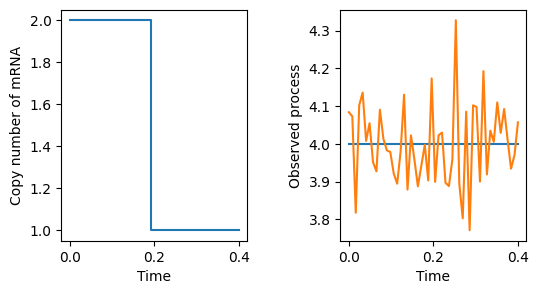

In [2]:
# Get a trajectory of the system
parameter_values_sets = []
# parameter_values_sets.append({'b1': 5, 'b2': 5, 'd1': 0.5, 'd2': 1}) # base parameters
parameter_values_sets.append({'mb': 2., 'md': 1, 'tr': 2, 'pd' : 0.5})

# parameter_values_sets.append({'k': 1, 'g': 1})


parameter_set_index = 0
parameter_values = parameter_values_sets[parameter_set_index]
#initial_state = {'M': 0, 'P': 0}
initial_states = []
for i in range(5):
    for j in range(5):
        initial_states.append({'mRNA': i, 'P': j})
        initial_states.append({'mRNA': i, 'P': j})

tf = 0.4
import random
time_list, state_list, cPP = MI.SSA(initial_states[int(random.random()*len(initial_states))], parameter_values, 0, tf, compute_centered_poisson_process=True)
MI.plot_trajectories(time_list, state_list)

# Generate the observations

Observation_times_list = np.linspace(0, tf, 50)
Y_list = MI.generate_observations(state_list, time_list, parameter_values, Observation_times_list)

# plot the observations
plt.plot(Observation_times_list, Y_list)
plt.ylabel("Observed process")
plt.show()

visualize the centered Poisson Process

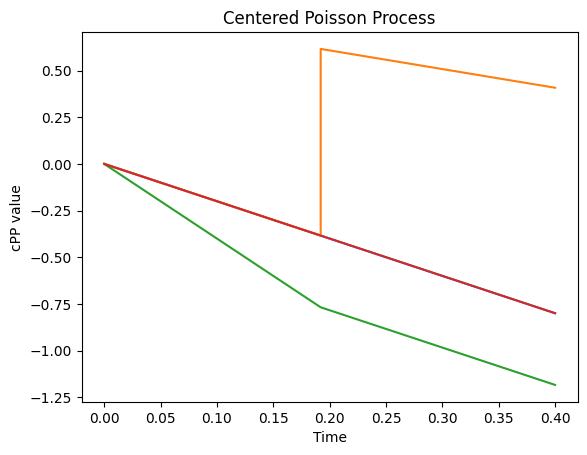

In [3]:
cPP.plot() 

### Dataloader structure

Let $\mathcal{T}$ be the set of measurement times, $\Tau$ the time discretization set, and $\mathcal{R}$ be the set of reactions. The dataloader should contain:

* $X(t) \forall t\in\Tau$ the full process 
* $Y(t) \forall t\in\mathcal{T}$ the observed process
* $\tilde{R}_k(t) \forall t\in\Tau, k\in \mathcal{R}$ the centered poisson process associated to the reaction $k$ 

this implies the following tensor dimensions (we condiser the batch size $B$) of the input tensors, respectively:

* $[B, |\Tau|, |X|]$
* $[B, |\mathcal{T}|, |y|]$
* $[B, |\Tau|, |r|]$


In [4]:
# use SSA to compute the conditional expectations:

n_samples = 10000  # p in the paper
batch_size = 250 #int(math.sqrt(n_samples))

n_Y_measurements = 5 # n in the paper
n_X_measurements_between_Y_measurements = 100 # m_bar-2 in the paper

import math
def run_SSA_for_filtering_cpp(MI, initial_states, parameter_values, t_fin, number_of_Y_samples, X_supersampling_intensity, t0=0, n_samples=1):
    """ 
    run multiple SSA simulations with the specified sampling strategy
    """

    X_sampling_times, Y_sampling_times = get_X_Y_sampling_times(t0, t_fin, number_of_Y_samples, X_supersampling_intensity)

    state_lists = []
    R_lists = []
    Y_lists = []

    for _ in tqdm(range(n_samples)):

        time_list, state_list, cPP = MI.SSA(initial_states[math.floor(random.random()*len(initial_states))], parameter_values, t0, t_fin, compute_centered_poisson_process=True)
        
        sampled_state_list = sample_trajectory_on_times(X_sampling_times, time_list, state_list)
        state_lists.append(sampled_state_list)
        # TODO check if R+ and R- are needed
        R = cPP.sample_at_times_with_observation_intervals(cPP._add_pre_times(X_sampling_times), Y_sampling_times)
        dR = R[2::2] - R[1:-1:2] # all pluses minus all minuses
        R_lists.append(dR)

        # Generate the observations
        Observation_times_list = Y_sampling_times
        Y_list = MI.generate_observations(state_list, time_list, parameter_values, Observation_times_list)
        Y_lists.append(Y_list)

    data = {"times_X" : X_sampling_times, "times_Y" : Y_sampling_times, "X" : state_lists, "Y" : Y_lists, "R" : R_lists}

    return data

dataset = run_SSA_for_filtering_cpp(MI, initial_states, parameter_values, tf, n_Y_measurements, n_X_measurements_between_Y_measurements, n_samples=n_samples)
#train_dataset, val_dataset, Xtimes, Ytimes = CRN_simulations_to_dataloaders(dataset, batch_size, test_split=0.2)
train_dataset, val_dataset, Xtimes, Ytimes = CRN_simulations_to_dataloaders(dataset, batch_size, test_split=0.2)

print('train_dataset: ', next(iter(train_dataset))[0].shape)

 54%|█████▍    | 5376/10000 [00:11<00:10, 449.08it/s]


KeyboardInterrupt: 

### New implementation based on deepCME

In [ ]:

from OtherNetworks import MLP, RNNEncoder
from DeepCME import FilteringDeepCME, TemporalFeatureExtractor
from copy import deepcopy

def deepcopy_flatten(x):
    other = deepcopy(x)
    if type(x) == RNNEncoder:
        other.RNN.flatten_parameters()
    return other

r = 2                          # number of temporal features
n = MI.get_number_of_species() # number of species
O = 1 # number of observed species

g_functions = [
    lambda x: x[:, 0],
    lambda x: x[:, 1],
    lambda x: x[:, 0]*0. + 1.,
    lambda x: x[:, 0]**2,
    lambda x: x[:, 1]**2,
]

R = len(g_functions)
K = MI.get_number_of_reactions()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

temporal_feature_extractor = TemporalFeatureExtractor(r, tf, device=device)

x_hidden_size = 32
x_encoder = MLP(n, x_hidden_size, x_hidden_size, 2, activation=torch.nn.ReLU, postprocessing_layer=None).to(device)
y_hidden_size = 64
#postproc = MLP(y_hidden_size, y_hidden_size, y_hidden_size, 2, activation=torch.nn.ReLU, postprocessing_layer=None).to(device)
y_encoder = RNNEncoder(O, y_hidden_size, activation=None).to(device)

L = 3                          # number of layers
hidden_size = 32
backbone = MLP(2*r+x_hidden_size+y_hidden_size, hidden_size, R*K, L, activation=torch.nn.ReLU, postprocessing_layer=None).to(device)
#baseline_net = MLP(2*r+x_hidden_size+y_hidden_size, hidden_size, R, L, activation=torch.nn.ReLU, postprocessing_layer=torch.nn.Softplus()).to(device)
baseline_net = MLP(x_hidden_size+y_hidden_size, hidden_size, R, L, activation=torch.nn.ReLU, postprocessing_layer=torch.nn.Softplus()).to(device) # without time


tau_list = torch.linspace(0, tf, n_X_measurements_between_Y_measurements+2)

# n_Y_measurements = 2 # n in the paper
# n_X_measurements_between_Y_measurements = 100 # m_bar-2 in the paper

measurement_times = torch.linspace(0, tf, n_Y_measurements)
tau_times = torch.linspace(0, tf/(n_Y_measurements-1), n_X_measurements_between_Y_measurements+2)

# likelihoods and h functions
from ElenaLosses import likelihood_GaussianNoise_vmap_compatible

def h_fun(x):
    out = x[:, 1:2]
    #out = x
    return out

sigma_prior = sigma
likelihood = likelihood_GaussianNoise_vmap_compatible
likelihood_parameters = {'noise_covariance': (torch.eye(1)*sigma_prior).to(device)}
likelihood_parameters["noise_covariance_determinant"] = torch.det(likelihood_parameters["noise_covariance"])
likelihood_parameters["noise_covariance_inverse"] = torch.inverse(likelihood_parameters["noise_covariance"])

chain = []
for i in range(n_Y_measurements-2,-1,-1):
    print(i)
    if i == n_Y_measurements-2:
        chain.append(FilteringDeepCME(deepcopy_flatten(backbone), deepcopy_flatten(x_encoder), deepcopy_flatten(y_encoder), deepcopy_flatten(baseline_net), tau_times, measurement_times, g_functions, deepcopy_flatten(temporal_feature_extractor), R, K, O, position_in_the_chain=i, n_NN_in_chain=n_Y_measurements-1, device=device, h_transform=h_fun, likelihood=likelihood, likelihood_parameters=likelihood_parameters, next_in_chain=None))
    else:
        chain.append(FilteringDeepCME(deepcopy_flatten(backbone), deepcopy_flatten(x_encoder), deepcopy_flatten(y_encoder), deepcopy_flatten(baseline_net), tau_times, measurement_times, g_functions, deepcopy_flatten(temporal_feature_extractor), R, K, O, position_in_the_chain=i, n_NN_in_chain=n_Y_measurements-1, device=device, h_transform=h_fun, likelihood=likelihood, likelihood_parameters=likelihood_parameters, next_in_chain=chain[-1]))


3
2
1
0


In [ ]:
def deepCME_training_loop(model, train_loader, optimizer, n_epochs, validation_loader=None, scheduler=None, sigma_decay_factor=0.5, sigma_decay_every=200, sigmamin=0.1, print_every=1, min_loss=0.000000000001):
    training_loss = []
    validation_loss = []
    best_model = model.state_dict()
    best = torch.tensor(float('inf'))
    for epoch in range(n_epochs):
        temp_loss = 0.
        for i, (X, Y, R) in enumerate(train_loader):
            X = X.to(model.device)
            Y = Y.to(model.device)
            R = R.to(model.device)
            def closure():
                optimizer.zero_grad()
                loss = model.loss(X, Y, R)
                training_loss.append((epoch*len(train_loader) + i, loss.item()))
                loss.backward()
                return loss
            optimizer.step(closure)
            temp_loss += training_loss[-1][1]
        if epoch % print_every == 0 :
            print(f'Training: Epoch {epoch}, Loss {temp_loss/len(train_loader)}')
        if scheduler is not None:
            scheduler.step()
        if epoch % sigma_decay_every == 0 and epoch > 0:
            if model.likelihood_parameters["noise_covariance"][0,0] > sigmamin:
                model.likelihood_parameters["noise_covariance"] *= sigma_decay_factor
                print(f"Decaying sigma to {model.likelihood_parameters['noise_covariance']}")

        if epoch % print_every == 0 and validation_loader is not None:
            temp_loss = 0.
            for i, (X, Y, R) in enumerate(validation_loader):
                with torch.no_grad():
                    X = X.to(model.device)
                    Y = Y.to(model.device)
                    R = R.to(model.device)
                    loss = model.loss(X, Y, R)
                    temp_loss += loss.item()
                    validation_loss.append((epoch*len(validation_loader) + i, loss.item()))
            if temp_loss > best:
                print(f'Validation: Epoch {epoch}, Loss {temp_loss/len(validation_loader)}')
            else:
                print(f'Validation: Epoch {epoch}, Loss {temp_loss/len(validation_loader)} (new best)')
                best = temp_loss
                best_model = model.state_dict()
            if temp_loss < min_loss:
                print("minimum loss reached, stepping out")
                break
    return training_loss, validation_loss, best_model


def chain_training_loop(chain, train_loader, n_epochs, validation_loader=None, lr=0.01, sigma_decay_factor=0.5, sigma_decay_every=200, sigmamin=0.1, print_every=1, min_loss=0.000000000001):
    state_dict_before = None

    training_losses = []
    validation_losses = []
    best_models_state_dicts = []

    for i, model in enumerate(chain):
        print(f"+++++ Training model {model.position_in_the_chain} +++++")
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        #optimizer = torch.optim.LBFGS(model.parameters(), lr=lr)
        training_loss, validation_loss, best_model = deepCME_training_loop(model, train_loader, optimizer, n_epochs, validation_loader=validation_loader, sigma_decay_factor=sigma_decay_factor, sigma_decay_every=sigma_decay_every, sigmamin=sigmamin, print_every=print_every, min_loss=min_loss)
        model.load_state_dict(best_model)
        model.freeze()
        training_losses.append(training_loss)
        validation_losses.append(validation_loss)
        best_models_state_dicts.append(best_model)

    return training_losses, validation_losses, best_models_state_dicts


training_losses, validation_losses, best_models_state_dicts = chain_training_loop(chain, train_dataset, 1000, validation_loader=val_dataset, lr=0.001, sigma_decay_factor=0.5, sigma_decay_every=3, sigmamin=sigma, print_every=5 , min_loss=0.000001)

+++++ Training model 3 +++++
Training: Epoch 0, Loss 0.16830535884946585
Validation: Epoch 0, Loss 0.14825808815658092 (new best)
Training: Epoch 5, Loss 0.02896540967049077
Validation: Epoch 5, Loss 0.022452574223279953 (new best)
Training: Epoch 10, Loss 0.01179815482464619
Validation: Epoch 10, Loss 0.010906549519859254 (new best)
Training: Epoch 15, Loss 0.007739388369373046
Validation: Epoch 15, Loss 0.007328562613110989 (new best)
Training: Epoch 20, Loss 0.006396202268661
Validation: Epoch 20, Loss 0.006145579973235726 (new best)
Training: Epoch 25, Loss 0.005299347030813806
Validation: Epoch 25, Loss 0.0053188950987532735 (new best)
Training: Epoch 30, Loss 0.004530045080173295
Validation: Epoch 30, Loss 0.004639270366169512 (new best)
Training: Epoch 35, Loss 0.003910943167284131
Validation: Epoch 35, Loss 0.0035928737197536975 (new best)
Training: Epoch 40, Loss 0.003434122998442035
Validation: Epoch 40, Loss 0.00317674913094379 (new best)
Training: Epoch 45, Loss 0.003135238

In [ ]:
for i in range(len(validation_losses)):
    plt.plot([x[0] for x in training_losses[i]], [x[1] for x in training_losses[i]], label=f'Training NN_{i}', alpha=0.7)
    plt.yscale('log')
plt.legend()
plt.title('Training losses')
plt.show()

for i in range(len(validation_losses)):
    plt.plot([x[0] for x in validation_losses[i]], [x[1] for x in validation_losses[i]], label=f'Validation NN_{i}', alpha=0.7)
    plt.yscale('log')
plt.legend()
plt.title('Validation losses')
plt.show()


NameError: name 'validation_losses' is not defined

#### Trajectory prediction

In [ ]:
def trajecory_plotter(X, Y, chain, tgt, tgt_sig_index, const_index, n_X_measurements_between_Y_measurements, device, sigma, obs_index=None, label=None):
    
    exact = []
    if not obs_index is None:
        observations = []
    predictions = []
    conditional_std = []

    predictions.append(X[0][tgt].item())
    conditional_std.append(2*sigma)

    for j, t in enumerate(measurement_times[1:]):
        #print(f"t={t}")
        #print("Obs:", Y[i], "with X:", X[i*(n_X_measurements_between_Y_measurements+1)])
        pred = chain[j].eval_baseline(t, X[0].to(device).unsqueeze(0), Y[1:(j+1+1)].unsqueeze(0).to(device))[0]
        #print("Predicted:", pred)
        exact.append(X[i*(n_X_measurements_between_Y_measurements+1)][tgt].item())
        if not obs_index is None:
            observations.append(Y[-(j+1)][0].item())
        predictions.append((pred[tgt]/pred[const_index]).cpu().detach().numpy())
        conditional_std.append(torch.sqrt(torch.abs(pred[tgt_sig_index]/pred[const_index] - (pred[tgt]/pred[const_index])**2)).cpu().detach().numpy())


    exact.append(X[0][tgt].item())
    if not obs_index is None:
        observations.append(Y[0][obs_index].item())
    

    exact.reverse()
    if not obs_index is None:
        observations.reverse() 
    #predictions.reverse()
    #conditional_std.reverse()

    plt.step(torch.linspace(0, tf, X.shape[0]), X[:, tgt], label='Exact', where='post')
    if not obs_index is None:
        plt.scatter(measurement_times, observations, label='Observations')
    
    plt.errorbar(measurement_times, predictions, yerr=[x*2 for x in conditional_std], fmt='o', alpha=0.5, color="orange")
    plt.errorbar(measurement_times, predictions, yerr=conditional_std, fmt='o', label='Predictions with error bars', color="orange")
    plt.legend()
    plt.xlabel('Time')
    if label is None:
        plt.ylabel('copy number')
    else:
        plt.ylabel('copy number of ' + label)

    plt.ylim(-1, 10)
    plt.show()


testing_trajectory = next(iter(val_dataset))
b = random.randint(0, testing_trajectory[0].shape[0]-1)
X = testing_trajectory[0][b]
Y = testing_trajectory[1][b]


trajecory_plotter(X, Y, chain, 0, 3, 2, n_X_measurements_between_Y_measurements, device, sigma, obs_index=None, label='mRNA')
trajecory_plotter(X, Y, chain, 1, 4, 2, n_X_measurements_between_Y_measurements, device, sigma, obs_index=0, label='P')

NameError: name 'val_dataset' is not defined

In [ ]:
Y

tensor([[ 2.1055],
        [ 0.9498],
        [ 1.0963],
        [-0.0652],
        [-0.0686]])

In [ ]:
X[[101*i for i in range(11)]]

IndexError: index 505 is out of bounds for dimension 0 with size 405

In [ ]:
raise Exception("Stop here")

Exception: Stop here